In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import pickle
import datetime as dt

import os, sys
from matplotlib import pyplot as plt



plt.style.use('ggplot')

import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
print('The scikit-learn version is {}.'.format(sklearn.__version__))


%matplotlib inline

The scikit-learn version is 0.24.1.


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE

# load data

In [4]:
PATH_DATA = "материалы по КП"

In [5]:
data_train = dd.read_csv(os.path.join(PATH_DATA,'data_train.csv'))
data_test = dd.read_csv(os.path.join(PATH_DATA,'data_test.csv'))

In [6]:
data_train.name = 'train'
data_test.name = 'test'
target = 'target'
RANDOM_STATE = 42

In [7]:
delimiter = '\\t'
features = dd.read_csv('материалы по КП/features.csv',
                        delimiter= delimiter,
                       blocksize=2**27)

# data processing

In [8]:
def data_processing(data):
    data_pr = data.merge(features, on=['id', 'buy_time']).compute()
    data_pr = data_pr.drop(['Unnamed: 0'],1)
    data_pr.to_csv(f'data_{data.name}_mib.csv', encoding='utf-8')

In [9]:
# data_processing(data_train)

In [10]:
# data_processing(data_test)

In [58]:
data_train_mib = pd.read_csv('data_train_mib.csv',index_col=0)
data_test_mib = pd.read_csv('data_test_mib.csv',index_col=0)
# data_test_mib.set_index('id', inplace=True)

In [12]:
data_train_chart = data_train_mib.copy()

In [13]:
data_train_mib.drop('vas_id',1,inplace=True)

In [14]:
data_train_chart.head()

,id,vas_id,buy_time,target,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,3769599,5.0,1540760400,0.0,199.810029,-106.489112,185.869214,-159.096798,180.451754,-180.20179,...,-977.373846,-613.770792,-25.996269,-37.630448,-300.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
1,3726958,2.0,1532293200,1.0,106.510029,58.440888,179.839214,227.803202,174.421754,206.69821,...,-733.373846,-463.770792,-25.996269,-37.630448,-234.747724,-22.832889,-0.694428,-9.175933,-0.45614,0.0
2,854525,6.0,1544994000,1.0,-96.119971,-386.899112,-110.060786,-439.506798,-115.478246,-460.61179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,877039,4.0,1532898000,0.0,-96.799971,263.440888,-110.740786,270.163202,-116.158246,249.05821,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
4,743296,6.0,1531688400,0.0,-92.559971,-380.799112,-102.260786,-429.166798,-107.678246,-450.27179,...,-734.373846,-374.770792,-23.996269,-18.630448,1610.252276,-14.832889,-0.694428,-1.175933,-0.45614,0.0


In [15]:
data_train_mib.head()

,id,buy_time,target,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,3769599,1540760400,0.0,199.810029,-106.489112,185.869214,-159.096798,180.451754,-180.20179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-300.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
1,3726958,1532293200,1.0,106.510029,58.440888,179.839214,227.803202,174.421754,206.69821,13.57382,...,-733.373846,-463.770792,-25.996269,-37.630448,-234.747724,-22.832889,-0.694428,-9.175933,-0.45614,0.0
2,854525,1544994000,1.0,-96.119971,-386.899112,-110.060786,-439.506798,-115.478246,-460.61179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,877039,1532898000,0.0,-96.799971,263.440888,-110.740786,270.163202,-116.158246,249.05821,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
4,743296,1531688400,0.0,-92.559971,-380.799112,-102.260786,-429.166798,-107.678246,-450.27179,-16.08618,...,-734.373846,-374.770792,-23.996269,-18.630448,1610.252276,-14.832889,-0.694428,-1.175933,-0.45614,0.0


In [16]:
data_train_chart['buy_time'] = pd.to_datetime(data_train_chart['buy_time'],unit='s')

# charts

In [17]:
data_train_chart['vas_id'].unique()

array([5., 2., 6., 4., 7., 1., 8., 9.])

In [18]:
data_train_chart_1 = data_train_chart[data_train_chart['vas_id'] == 1]

Text(0, 0.5, 'id')

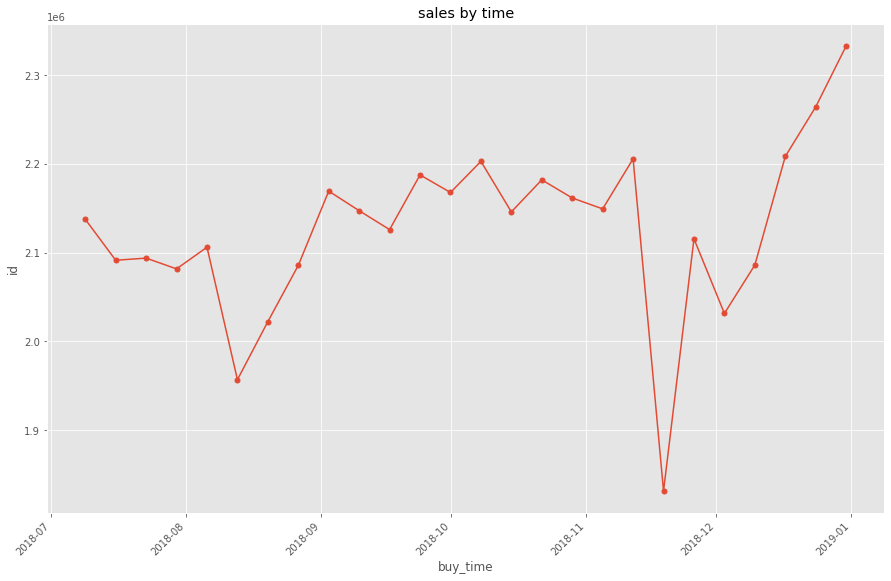

In [19]:
plt.figure(figsize = (15,10))
data_train_chart.groupby(['buy_time'])['id'].mean().plot(grid= True, rot =45, title= 'sales by time', marker ='.', markersize=10)
plt.ylabel('id')

Text(0, 0.5, 'vas_id')

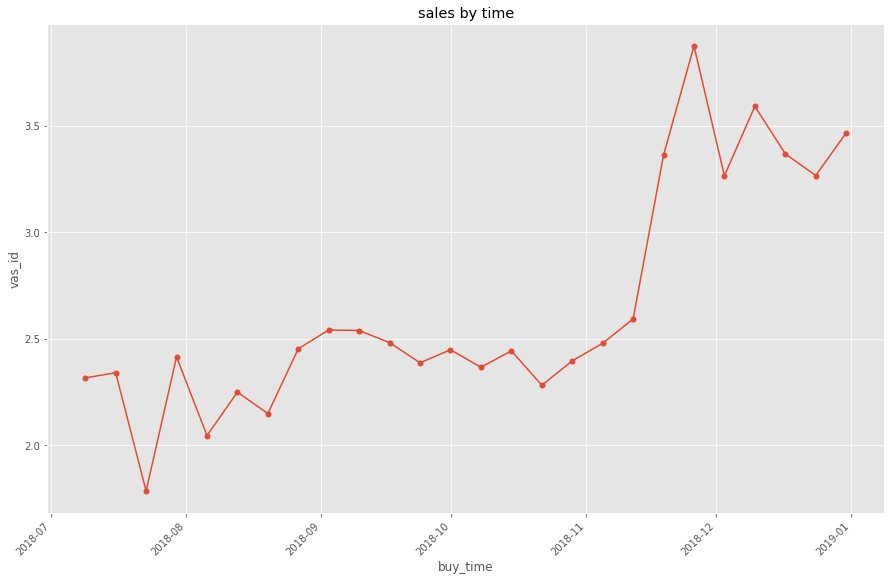

In [20]:
plt.figure(figsize = (15,10))
data_train_chart.groupby(['buy_time'])['vas_id'].mean().plot(grid= True, rot =45, title= 'sales by time', marker ='.', markersize=10)
plt.ylabel('vas_id')

Text(0, 0.5, 'id')

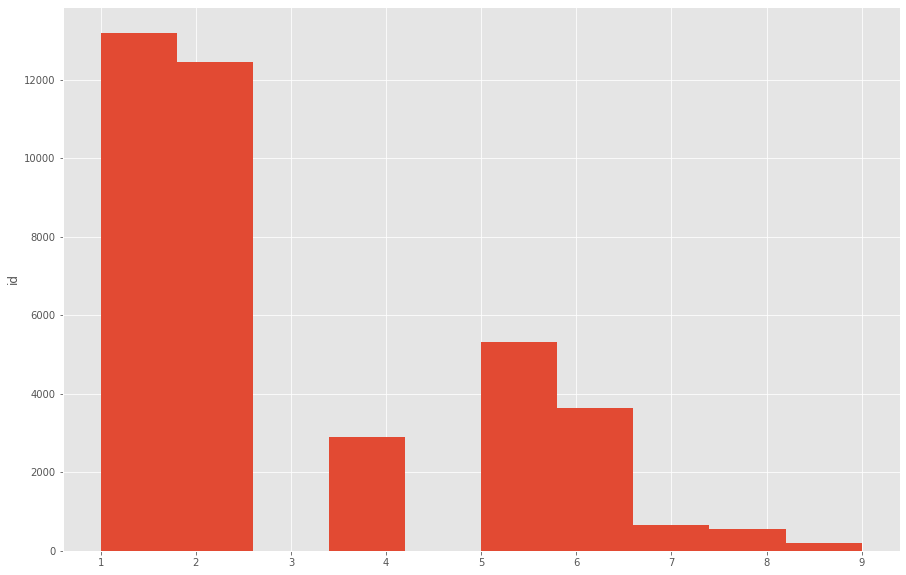

In [21]:
plt.figure(figsize = (15,10))
data_train_chart.groupby(['id'])['vas_id'].mean().hist()
plt.ylabel('id')

# BaseLine

In [22]:
TimeStamp = 'buy_time'

In [23]:
X = data_train_mib.drop(target,1)
y = data_train_mib[target]

In [24]:
# X_train = data_train_mib[(data_train_mib['buy_time'].dt.month <= 11) ]
# X_test = data_train_mib[data_train_mib['buy_time'].dt.month == 12 ]

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,  random_state = RANDOM_STATE)

In [26]:
lgr = LogisticRegression()

In [27]:
lgr = lgr.fit(X_train, y_train)

In [28]:
lgr_pred = lgr.predict(X_val)

In [29]:
print(classification_report(y_val, lgr_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      9071
         1.0       0.00      0.00      0.00       659

    accuracy                           0.93      9730
   macro avg       0.47      0.50      0.48      9730
weighted avg       0.87      0.93      0.90      9730



In [30]:
data_train_mib[target].value_counts()

0.0    36277
1.0     2642
Name: target, dtype: int64

из-за сильного дисбаланса модель не предсказывает "1"

# balance target

In [31]:
# убираю дисбаланс и удаляю дубликаты, т.к после процедуры выравнивания появятся к тем немногим дубликатам которые были ещё
def balance(data, target, method):
    bl = method(random_state= RANDOM_STATE)
    X = data.drop(target, 1)
    y = data[target]
    X_bal, y_bal = bl.fit_resample(X, y)
    data = pd.concat([X_bal, y_bal], axis=1)
    
#     data.set_index('buy_time', inplace=True)
    
    data_dupl = data[data.duplicated(keep=False)]
    data = data[~data.index.isin(data_dupl.index)]
    
    return data

In [32]:
data_train =pd.DataFrame(balance(data_train_mib, target, SMOTE))

In [33]:
data_train[target].value_counts()

0.0    36277
1.0    36271
Name: target, dtype: int64

In [34]:
data_train.head()

,id,buy_time,0,1,2,3,4,5,6,7,...,244,245,246,247,248,249,250,251,252,target
0,3769599,1540760400,199.810029,-106.489112,185.869214,-159.096798,180.451754,-180.20179,-16.08618,-65.076097,...,-613.770792,-25.996269,-37.630448,-300.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,0.0
1,3726958,1532293200,106.510029,58.440888,179.839214,227.803202,174.421754,206.69821,13.57382,53.573903,...,-463.770792,-25.996269,-37.630448,-234.747724,-22.832889,-0.694428,-9.175933,-0.45614,0.0,1.0
2,854525,1544994000,-96.119971,-386.899112,-110.060786,-439.506798,-115.478246,-460.61179,-16.08618,-65.076097,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1.0
3,877039,1532898000,-96.799971,263.440888,-110.740786,270.163202,-116.158246,249.05821,-16.08618,-5.756097,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,0.0
4,743296,1531688400,-92.559971,-380.799112,-102.260786,-429.166798,-107.678246,-450.27179,-16.08618,-65.076097,...,-374.770792,-23.996269,-18.630448,1610.252276,-14.832889,-0.694428,-1.175933,-0.45614,0.0,0.0


In [59]:
# data_train['buy_time'] = pd.to_datetime(data_train['buy_time'],unit='s')
data_test_mib['buy_time'] = pd.to_datetime(data_test_mib['buy_time'],unit='s')

In [60]:
# data_train = data_train.sort_values(by = 'buy_time')
data_test_mib = data_test_mib.sort_values(by = 'buy_time')

In [61]:
# data_train.set_index('buy_time', inplace=True)
data_test_mib.set_index('buy_time', inplace=True)

# training model

In [38]:
score = pd.read_csv('score.csv',index_col=0)
score.head()

,f1,LogisticRegression(),KNeighborsClassifier(),GradientBoostingClassifier(),LGBMClassifier(),CatBoostClassifire,RandomForestClassifier()
0,1,0.58,0.68,0.94,0.94,0.94,0.92
1,macro,0.48,0.66,0.94,0.95,0.95,0.93
2,micro,0.48,0.66,0.94,0.95,0.95,0.93
3,weighted,0.47,0.65,0.94,0.95,0.95,0.93


мною были обучены модели представленные в датафрейме "score", выбор модели сделал по метрике "f1 macro"

In [39]:
# score = pd.DataFrame({'f1': ['1', 'macro', 'micro', 'weighted']})
# score.to_csv('score.csv')

в функции "process_ml" я делаю стандартизацию признаков и обучаю на выбранной модели

In [40]:
def process_ml(data, target, model):
    print(str(model).split('.')[0])
        
    X = data.drop(target, 1)
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25,shuffle = False, random_state = RANDOM_STATE) 
    
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', model)])
    model_pipe = pipe.fit(X_train, y_train)
    pred = model_pipe.predict(X_test)
    
#     model_pipe = model
#     model_pipe = model_pipe.fit(X_train, y_train)
#     pred = model_pipe.predict(X_test)
    
    f1_1 = round(f1_score(y_test,pred), 2)
    f1_macro = round(f1_score(y_test,pred, average='macro'), 2)
    f1_micro = round(f1_score(y_test,pred, average='micro'), 2)
    f1_weighted = round(f1_score(y_test,pred, average='weighted'), 2)
    
    score_sc = pd.DataFrame({'f1': ['1', 'macro', 'micro', 'weighted']})
    if str(model).split('.')[0] == '<catboost':
        score[f'CatBoostClassifire'] = [f1_1, f1_macro, f1_macro, f1_weighted]
    else:
        score[f'{model}'] = [f1_1, f1_macro, f1_macro, f1_weighted]
    
    print(classification_report(y_test, pred))
    
    with open("Voronkov_model.pkl", "wb") as f:
        pickle.dump(model_pipe, f)
    
    if str(model).split('.')[0] == '<catboost':
        print( f'модель CatBoostClassifier отработала и была записана в файл (Voronkov_model.pkl), \n выше показан score на тесте') 
    else:
        print( f'модель {model} отработала и была записана в файл (Voronkov_model.pkl), \n выше показан score на тесте')
    
    

In [437]:
process_ml(data_train, 'target', LogisticRegression())

LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.60      0.28      0.38      9922
         1.0       0.47      0.77      0.58      8215

    accuracy                           0.50     18137
   macro avg       0.53      0.53      0.48     18137
weighted avg       0.54      0.50      0.47     18137

модель LogisticRegression() отработала и была записана в файл (Voronkov_model.pkl), 
 выше показан score на тесте


In [438]:
process_ml(data_train, 'target', KNeighborsClassifier())

KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.77      0.53      0.63      9922
         1.0       0.59      0.81      0.68      8215

    accuracy                           0.66     18137
   macro avg       0.68      0.67      0.66     18137
weighted avg       0.69      0.66      0.65     18137

модель KNeighborsClassifier() отработала и была записана в файл (Voronkov_model.pkl), 
 выше показан score на тесте


In [439]:
process_ml(data_train, 'target', LGBMClassifier())

LGBMClassifier()
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      9922
         1.0       1.00      0.89      0.94      8215

    accuracy                           0.95     18137
   macro avg       0.96      0.94      0.95     18137
weighted avg       0.95      0.95      0.95     18137

модель LGBMClassifier() отработала и была записана в файл (Voronkov_model.pkl), 
 выше показан score на тесте


In [41]:
process_ml(data_train, 'target', CatBoostClassifier(silent=True))

<catboost
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      9922
         1.0       1.00      0.89      0.94      8215

    accuracy                           0.95     18137
   macro avg       0.96      0.94      0.95     18137
weighted avg       0.95      0.95      0.95     18137

модель CatBoostClassifier отработала и была записана в файл (Voronkov_model.pkl), 
 выше показан score на тесте


In [441]:
process_ml(data_train, 'target', RandomForestClassifier())

RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      9922
         1.0       1.00      0.86      0.92      8215

    accuracy                           0.93     18137
   macro avg       0.95      0.93      0.93     18137
weighted avg       0.94      0.93      0.93     18137

модель RandomForestClassifier() отработала и была записана в файл (Voronkov_model.pkl), 
 выше показан score на тесте


In [442]:
# score.to_csv('score.csv')

## grid catboost

In [443]:
# X = data_train.drop(target, 1)
# y = data_train[target]
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, shuffle = False, random_state = RANDOM_STATE) 

In [444]:
# from sklearn.model_selection import GridSearchCV

In [445]:
# model_cat2 = CatBoostClassifier(random_state = RANDOM_STATE, silent=True)

In [446]:
# param = {'learning_rate': [0.5, 0.01],
#         'depth': [3, 10]}

In [447]:
# grid_cat = GridSearchCV(model_cat2, param, n_jobs=-1, cv=5)

In [448]:
# grid_cat_res = grid_cat.fit(X_train,y_train)

In [449]:
# grid_cat_pred = grid_cat_res.predict(X_test)

In [450]:
# print(classification_report(y_test, grid_cat_pred))

In [451]:
# f1_1 = round(f1_score(y_test,grid_cat_pred), 2)
# f1_macro = round(f1_score(y_test,grid_cat_pred, average='macro'), 2)
# f1_micro = round(f1_score(y_test,grid_cat_pred, average='micro'), 2)
# f1_weighted = round(f1_score(y_test,grid_cat_pred, average='weighted'), 2)
    
# score['grid_CatBoost'] = [f1_1, f1_macro, f1_macro, f1_weighted]

In [452]:
# score.to_csv('score.csv')

## grid GradientBoosting

In [453]:
# model_xgb = GradientBoostingClassifier(random_state = RANDOM_STATE)

In [454]:
# grid_xgb = GridSearchCV(model_xgb, param, n_jobs=-1, cv=5)

In [455]:
# grid_xgb = grid_xgb.fit(X_train, y_train)

In [456]:
# xgb_pred = grid_xgb.predict(X_test)

In [457]:
# print(classification_report(y_test, xgb_pred))

In [458]:
# f1_1 = round(f1_score(y_test,xgb_pred), 2)
# f1_macro = round(f1_score(y_test,xgb_pred, average='macro'), 2)
# f1_micro = round(f1_score(y_test,xgb_pred, average='micro'), 2)
# f1_weighted = round(f1_score(y_test,xgb_pred, average='weighted'), 2)
    
# score['grid_XGB'] = [f1_1, f1_macro, f1_macro, f1_weighted]

In [459]:
# score.to_csv('score.csv')

## lgboost

In [460]:
# model_lgbm = LGBMClassifier(random_state = RANDOM_STATE)

In [461]:
# grid_lgbm = GridSearchCV(model_lgbm, param, n_jobs=-1, cv=5)

In [462]:
# grid_lgbm = grid_lgbm.fit(X_train, y_train)

In [463]:
# lgbm_pred = grid_lgbm.predict(X_test)

In [464]:
# print(classification_report(y_test, lgbm_pred))

In [465]:
# f1_1 = round(f1_score(y_test,lgbm_pred), 2)
# f1_macro = round(f1_score(y_test,lgbm_pred, average='macro'), 2)
# f1_micro = round(f1_score(y_test,lgbm_pred, average='micro'), 2)
# f1_weighted = round(f1_score(y_test,lgbm_pred, average='weighted'), 2)
    
# score['grid_lgbm'] = [f1_1, f1_macro, f1_macro, f1_weighted]

In [466]:
# score.to_csv('score.csv')

# load model

In [55]:
with open("Voronkov_model.pkl", "rb") as f:
    Voronkov_model = pickle.load(f)

In [53]:
# data_test_mib.set_index('id', inplace=True)

In [62]:
data_test_mib.drop('vas_id', 1, inplace=True)

In [63]:
answers_test = Voronkov_model.predict(data_test_mib)

In [66]:
answers_test = answers_test.T

In [69]:
answers_test = pd.DataFrame(answers_test)

In [70]:
answers_test

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2043,0.0
2044,0.0
2045,0.0
2046,0.0


In [71]:
answers_test.to_csv('answers_test.csv')

In [72]:
answers_test[0].value_counts()

0.0    2047
1.0       1
Name: 0, dtype: int64